<h1><center>PROGRAMACION NO LINEAL</center></h1>


<h2><center>Jorge Ivan Romero</center></h2>
<h3><center>Aplicaciones no lineal con Pyomo</center></h3>
<center><img src="https://static1.squarespace.com/static/5492d7f4e4b00040889988bd/t/54a3118ae4b0fe11940f9f58/1621524433093/"     
width="300" height="100" /></center>
<h4><center></center></h4>
<p><center>utadeo</center></p>




# 0. Diferencia entre PL y PNL
* Podemos tener progamacion lineal y no lineal.
* la PL tiene fo y restricciones lineales.
* la pnl puede tener combinaciones sobre la fo o restricciones siendo almenos una de ellas no lineal.

In [20]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Mesh3d(
        x=[0, 1, 2, 0],
        y=[0, 0, 1, 2],
        z=[0, 2, 0, 1],
        colorbar_title='z',
        colorscale=[[0, 'gold'],
                    [0.5, 'mediumturquoise'],
                    [1, 'magenta']],

        intensity=[0, 0.33, 0.66, 1],

        i=[0, 0, 0, 1],
        j=[1, 2, 3, 2],
        k=[2, 3, 1, 3],
        name='y',
        showscale=True
    )
])
fig.update_layout(title='OJO!! En lp tenemos vertices lineales', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [21]:
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)])

fig.update_layout(title='ENCAMBIO en nlp cambia: Superficies con multiples vertices', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

# 1. COMENZANDO CON UNA FUNCION NO LINEAL


Grafico de funcion no lineal de una variable



$12x^5$-$975x^4$+$28000x^3$-$345000x^2$+$1800000x$




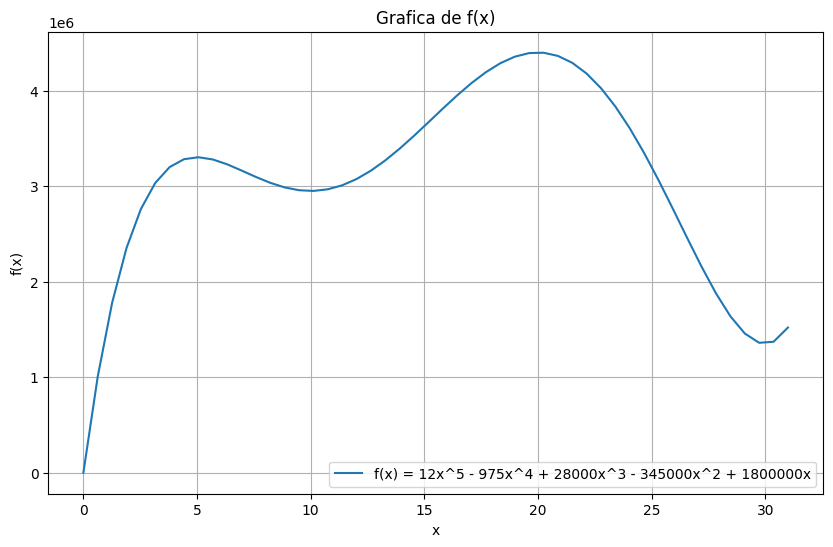

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 31, n)
f_x = 12*x**5 - 975*x**4 + 28000*x**3 - 345000*x**2 + 1800000*x
plt.figure(figsize=(10, 6))
plt.plot(x, f_x, label="f(x) = 12x^5 - 975x^4 + 28000x^3 - 345000x^2 + 1800000x")
plt.title("Grafica de f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

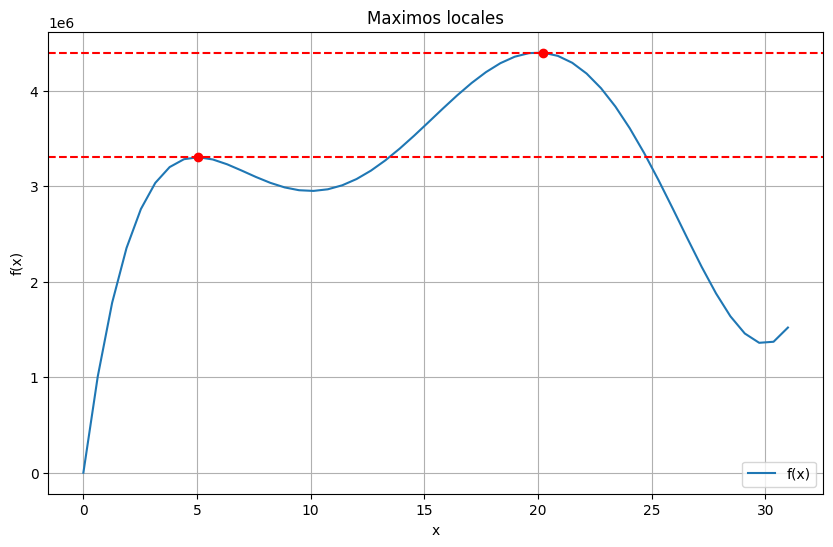

In [6]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(f_x)
plt.figure(figsize=(10, 6))
plt.plot(x, f_x, label="f(x)")
for peak in peaks:
    plt.plot(x[peak], f_x[peak], 'ro')
    plt.axhline(y=f_x[peak], color='r', linestyle='--') #
plt.title("Maximos locales")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

In [8]:
pip install pyomo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.3 MB/s eta 0:00:00


# 2. Estrategias para Encontrar el Óptimo Global

- **Uso de un Solver Global:** Algunos solvers están diseñados para buscar óptimos globales en problemas no lineales. Estos incluyen solvers globales como **BARON, Couenne o SCIP**. Estos solvers intentan encontrar el óptimo global, pero pueden ser más lentos o requerir más recursos computacionales.

- **Análisis Gráfico:** Para funciones de una sola variable, una simple visualización gráfica de la función en el rango de interés puede ayudar a identificar regiones donde se encuentran los óptimos globales y locales. Esto puede informar sobre buenos puntos de partida o rangos para explorar más a fondo.

- **Multiples Puntos de Inicio:** Realiza optimizaciones múltiples desde diferentes puntos de inicio en el dominio de la función. Esto aumenta la probabilidad de encontrar el óptimo global al explorar diferentes regiones del espacio de búsqueda.

- **Heurísticas y Métodos Metaheurísticos:** Métodos como el algoritmo genético, la optimización por enjambre de partículas (PSO) o el recocido simulado pueden explorar el espacio de soluciones de manera más efectiva en algunos casos y ayudar a encontrar el óptimo global. Estos métodos no están directamente disponibles en Pyomo, pero puedes combinarlos con Pyomo para evaluar la función objetivo.

## 2.1. Por ejemplo varios inicios  

In [14]:
from pyomo.environ import *
import os
os.environ['NEOS_EMAIL'] = 'jorgei.romerog@utadeo.edu.co'
model = ConcreteModel()
model.x = Var(bounds=(0, 31), within=Reals, initialize=10)
model.obj = Objective(expr=12*model.x**5 - 975*model.x**4 + 28000*model.x**3 - 345000*model.x**2 + 1800000*model.x, sense=maximize)
solver_manager = SolverManagerFactory('neos')
results = solver_manager.solve(model, solver="ipopt")
print(f"Valor óptimo de x: {model.x.value}")
print(f"Valor máximo de la función: {model.obj.expr()}")

Valor óptimo de x: 19.999999999999964
Valor máximo de la función: 4399999.999999978


In [16]:
from pyomo.environ import *
import numpy as np

# Define la función objetivo como una función de Python
def polynomial_objective(model):
    return 12*model.x**5 - 975*model.x**4 + 28000*model.x**3 - 345000*model.x**2 + 1800000*model.x

# Lista de puntos de inicio
starting_points = [0, 10, 20, 31]

# Variable para guardar la mejor solución
best_solution = None
best_objective = float('-inf')

# Solver
solver = SolverFactory('ipopt')

for point in starting_points:
    model = ConcreteModel()
    model.x = Var(initialize=point, within=Reals)
    model.obj = Objective(rule=polynomial_objective, sense=maximize)
    solver_manager = SolverManagerFactory('neos')
    results = solver_manager.solve(model, solver="ipopt")

    # Verifica si esta solución es mejor que la mejor encontrada hasta ahora
    current_objective = value(model.obj)
    if current_objective > best_objective:
        best_solution = value(model.x)
        best_objective = current_objective

print(f"Mejor solución encontrada: x = {best_solution}, con un valor objetivo de {best_objective}")


ERROR:pyomo.neos:Error loading NEOS solution into model  NEOS log:
Job 14026367 dispatched
password: oziKrOvX
---------- Begin Solver Output -----------
Condor submit: 'neos.submit'
Condor submit: 'watchdog.submit'
Job submitted to NEOS HTCondor pool.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pyomo/neos/plugins/kestrel_plugin.py", line 229, in _perform_wait_any
    _model.solutions.load_from(
  File "/usr/local/lib/python3.10/dist-packages/pyomo/core/base/PyomoModel.py", line 228, in load_from
    raise ValueError(
ValueError: Cannot load a SolverResults object with bad status: error
ERROR:pyomo.neos:Ipopt 3.14.12: Error in step computation.


Mejor solución encontrada: x = 20.0, con un valor objetivo de 4400000.0


## 2.2. Aplicaciones:
### 2.2.1. Optimización de Carteras con Programación No Lineal

Minimizar $\quad V(\mathbf{x})=\sum_{i=1}^n \sum_{j=1}^n \sigma_{i j} x_i x_j$, sujeta a
$$
\begin{aligned}
& \sum_{j=1}^n \mu_j x_j \geq L \\
& \sum_{j=1}^n P_j x_j \leq B \\
& \mathrm{y} \\
& x_j \geq 0, \quad \text { para } j=1,2, \ldots, n
\end{aligned}
$$



El modelo de optimización de carteras utiliza la programación no lineal para balancear el rendimiento esperado `R(x)` y el riesgo `V(x)`, donde `V(x)` evalúa el riesgo de la cartera. Se busca minimizar `V(x)` manteniendo `R(x)` por encima de un mínimo aceptable. Las variables de decisión `xj` (para `j = 1, 2, ..., n`) representan las cantidades de cada tipo de activo en la cartera, con restricciones que aseguran que ninguna inversión sea negativa y que el rendimiento esperado exceda un umbral `L`. El presupuesto total asignado es `B`, y `Pj` indica el precio de cada activo.

### Desafíos y Soluciones en la Selección de `L`

Elegir un valor adecuado para `L` es complicado, pero fundamental para lograr una combinación óptima entre `R(x)` y `V(x)`. Para abordar esto, se usa la programación no lineal paramétrica, generando soluciones óptimas en función de diversos valores de `L`. Este enfoque facilita la elección de la cartera más balanceada evaluando las soluciones a lo largo de la frontera eficiente, un concepto clave en la teoría moderna de optimización de portafolios.

### Frontera Eficiente y Significado en la Práctica Financiera

Un punto óptimo en el espacio `(R(x), V(x))` se sitúa en la frontera de posibilidades factibles, representando una cartera eficiente donde ninguna otra opción ofrece un rendimiento mayor sin aumentar el riesgo, o un riesgo menor sin reducir el rendimiento. La aplicación de este modelo de programación no lineal es crucial en el análisis financiero contemporáneo y forma un pilar del campo emergente de la ingeniería financiera. Este enfoque ha tenido un impacto significativo en la práctica, impulsando investigaciones continuas para expandir el entendimiento de sus aplicaciones y propiedades en la optimización de portafolios y otros complejos desafíos financieros.


In [22]:
import yfinance as yf
import pandas as pd

def historicos(symbol=None):
    if symbol is None:
        raise ValueError("No symbol has been provided")

    # Descarga datos históricos de precios diarios de cierre
    data = yf.download(symbol, period="1y")  # puedes ajustar el periodo como desees
    if data.empty:
        raise ValueError(f"No data for symbol {symbol}")
    cierre = data['Close']
    return cierre

def rendimientos(a):
    data = []
    tam = len(a)
    tam = tam - 1
    for i in range(tam):
        data.append(1 - (a[i+1] / a[i]))
    return data


In [23]:
import pandas as pd
import numpy as np

apl=historicos('AAPL')
apl

[*********************100%%**********************]  1 of 1 completed


Date
2023-03-13    150.470001
2023-03-14    152.589996
2023-03-15    152.990005
2023-03-16    155.850006
2023-03-17    155.000000
                 ...    
2024-03-05    170.119995
2024-03-06    169.119995
2024-03-07    169.000000
2024-03-08    170.729996
2024-03-11    172.750000
Name: Close, Length: 251, dtype: float64

In [24]:
#descargamos historicos
mcd=historicos('MCD')
lat=historicos('LTMAY')
pf=historicos('PFE')
argos=historicos('CMTOY')
# calculamos rendimientos miu_j
r1=rendimientos(mcd)
r4=rendimientos(lat)
r2=rendimientos(pf)
r3=rendimientos(argos)
datos=np.array([r1,r2,r3,r4])
covMat=np.cov(datos,bias=True)
np.set_printoptions(suppress=True)
print(covMat)
df=pd.DataFrame(covMat,index=['Mcdonalds','Pfizer','Argos','Latam'])
df.columns=['Mcdonalds','Pfizer','Argos','Latam']
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[[0.00007283 0.00000723 0.00001644 0.00001395]
 [0.00000723 0.00022877 0.00006229 0.00002612]
 [0.00001644 0.00006229 0.00632374 0.00014986]
 [0.00001395 0.00002612 0.00014986 0.00230542]]


,Mcdonalds,Pfizer,Argos,Latam
Mcdonalds,0.000073,0.000007,0.000016,0.000014
Pfizer,0.000007,0.000229,0.000062,0.000026
Argos,0.000016,0.000062,0.006324,0.000150
Latam,0.000014,0.000026,0.000150,0.002305


In [25]:
s=pd.DataFrame(mcd)
s.rename(columns={'Close':'McDonalds'},inplace=True)
s['latam']=lat
s['pfizer']=pf
s['argos']=argos
s.head()

,McDonalds,latam,pfizer,argos
Date,,,,
2023-03-13,263.079987,0.43,39.860001,2.99
2023-03-14,265.899994,0.39,39.900002,2.99
2023-03-15,266.339996,0.39,40.279999,2.99
2023-03-16,270.570007,0.39,40.369999,2.99
2023-03-17,267.200012,0.38,40.099998,1.60


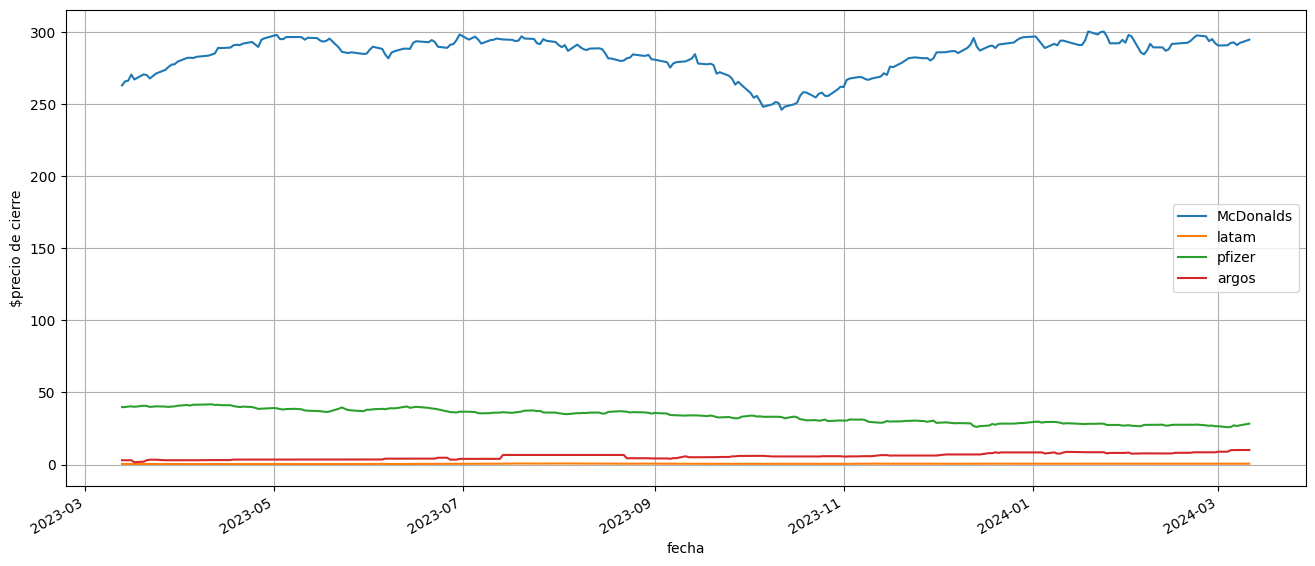

In [26]:
s.plot(figsize=(16,7),xlabel="fecha",ylabel="$precio de cierre",grid=True);

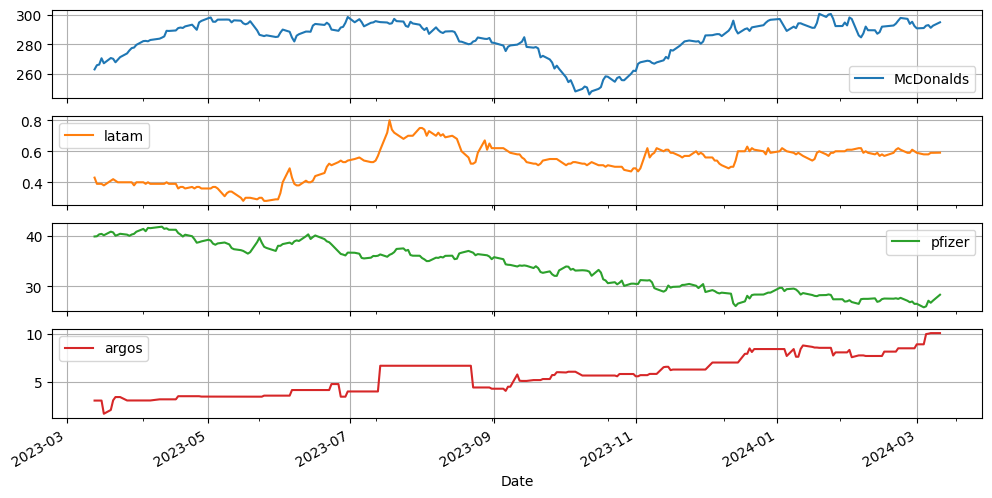

In [27]:
s.plot(subplots=True,figsize=(12,6),grid=True);

In [28]:
import plotly.express as px

fig= px.line(s,x=s.index,y=s.columns)
fig.show()

In [29]:
precio={'Mcdonalds':291.3,'Pfizer':36.42,'Argos':3.4,'Latam': 0.5361}
precio

{'Mcdonalds': 291.3, 'Pfizer': 36.42, 'Argos': 3.4, 'Latam': 0.5361}

In [30]:
m1 = np.mean(r1)
m2 = np.mean(r2)
m3 = np.mean(r3)
m4 = np.mean(r4)
miu={'Mcdonalds':m1,'Pfizer':m2,'Argos':m3,'Latam': m4}
miu

{'Mcdonalds': -0.0004922346402684297,
 'Pfizer': 0.001244616738093015,
 'Argos': -0.00789865664478032,
 'Latam': -0.002375304490962824}

In [31]:
import pandas as pd
from pyomo.environ import *
import os

i=list(df.index.map(str))
covar={(n,m):df.at[n,m] for n in i for m in i}
rend=miu
precio=precio

os.environ['NEOS_EMAIL']='jorgei.romerog@utadeo.edu.co'
po=ConcreteModel()
po.x=Var(i,domain=NonNegativeReals)

po.obj=Objective(expr=sum((po.x[n]*covar[n,m])*po.x[n] for n in i for m in i),sense=minimize)
#po.r1=Constraint(exp=sum(po.x[n]*rend[n] for n in i)>=0.00000000001)
#po.r2=Constraint(exp=sum(po.x[n]*precio[n] for n in i)<=100000)
po.r1=Constraint(expr=sum(po.x[n] for n in i)==1)
solver_manager=SolverManagerFactory('neos')
results=solver_manager.solve(po, solver="knitro")
print('LOS RESULTADOS SON')
print('\n El menor riesgo es =',po.obj())
for n in i:
  print(n,po.x[n]())



LOS RESULTADOS SON

 El menor riesgo es = 7.88147083738786e-05
Mcdonalds 0.7122290217553837
Pfizer 0.24246794921278103
Argos 0.013476853804711976
Latam 0.03182617522712323


-----------------

### 2.2.2. Seleccion de objetivos militares



In [32]:
import pandas as pd
df=pd.read_excel('armas.xlsx','acertar',header=0,index_col=0).fillna(0)
daño=df.iloc[0:5,0:20]
i=list(daño.index.map(str))
j=list(daño.columns.map(str))
dam={(a,b):daño.at[a,b] for a in i for b in j}
disp={(a):df['avail'].at[a] for a in i}
min_armas={(a):df.iloc[6].at[a] for a in j}
valor={(a):df.iloc[5].at[a] for a in j}

In [33]:
df

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t12,t13,t14,t15,t16,t17,t18,t19,t20,avail
icbm,0.00,0.05,0.00,0.00,0.00,0.15,0.10,0.15,0.20,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,200.0
mrbm-1,0.16,0.17,0.15,0.16,0.15,0.19,0.19,0.18,0.20,0.14,...,0.02,0.00,0.12,0.13,0.12,0.15,0.16,0.15,0.15,100.0
lr-bomber,0.04,0.05,0.04,0.04,0.04,0.10,0.08,0.09,0.08,0.05,...,0.02,0.01,0.02,0.03,0.02,0.05,0.08,0.07,0.08,300.0
f-bomber,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,...,0.08,0.09,0.08,0.02,0.07,0.00,0.00,0.00,0.00,150.0
mrbm-2,0.08,0.06,0.08,0.05,0.05,0.02,0.02,0.00,0.00,0.10,...,0.04,0.09,0.02,0.01,0.01,0.00,0.00,0.00,0.00,250.0
damage,60.00,50.00,50.00,75.00,40.00,60.00,35.00,30.00,25.00,150.00,...,45.00,125.00,200.00,200.00,130.00,100.00,100.00,100.00,150.00,0.0
target,30.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,40.00,...,0.00,0.00,50.00,70.00,35.00,0.00,0.00,0.00,10.00,0.0


-----------
Ahora desarrollamos el modelo de optimizacion:
## Las variables $x_{i,j}$

```python
from pyomo.environ import *
armas=ConcreteModel()
armas.x=Var(i,j domain=NonNegativeReals)
```
Llamamos $x$ a las variables dado su notacion para el problema. La indexacion esta en $i$ por las **armas** y en $j$ por los **20 blancos**  que tiene este problema.

-----------

## La funcion objetivo
La función objetivo se formula en términos de probabilidad de daño de varios objetivos ponderados por su valor militar.

- Defina $\alpha_{i,j}$ = la probabilidad de que el objetivo $j$ no resulte dañado por un ataque con una unidad de arma $i$ \\
- Defina $u_{j}$ = el valor militar del objetivo $j$

El daño esperado al objetivo  $j$ por una asignacion de armas de $x_{i j}$ de tipo $i$ es $\left[1-\alpha_{i j}^{x_{i j}}\right]$, y el daño esperado al objetivo $j$ por la asignación general de armas de todos los tipos $\sum_{i=1}^{n} x_{i j}$ is $\left[1-\prod_{i=1}^{n} \alpha_{i j}^{x_{i j}}\right]$. El valor de daño total esperado al objetivo es la suma del daño esperado a los objetivos ponderado por el valor militar de los objetivos $u_{j}$,

$$
\sum_{j=1}^{m} u_{j}\left[1-\prod_{i=1}^{n} \alpha_{i j}^{x_{i j}}\right]
$$

```python
armas.obj=Objective(expr=sum(valor[m]*prod(armas.x[n,m]**dam[n,m] for n in i) for m in j) ,sense=maximize)
```


-----------

## Las restricciones

Las limitaciones en el número de armas asignadas se especifican en términos de
- $ a_ {i} = $ el número total de armas de tipo $ i $ disponibles,
- $ b_ {j} = $ el número mínimo de armas de todos los tipos asignados al objetivo $ j $.
Las restricciones sobre el número total de armas y el mínimo de armas asignadas a los objetivos son

$$
\begin{aligned}
&\sum_{j=1}^{m} x_{i j} \leq a_{i}, \quad i=1, \ldots, n \\
&\sum_{i=1}^{n} x_{i j} \geq b_{j}, \quad j=1, \ldots, m
\end{aligned}
$$

```python
armas.disp=ConstraintList()
for n in i:
  armas.disp.add(sum(armas.x[n,m] for m in j)<= disp[n])
armas.min=ConstraintList()
for m in j:
  armas.min.add(sum(armas.x[n,m] for n in i)>= min_armas[m])
```


-----------

In [41]:
import pandas as pd
from pyomo.environ import *
import os
os.environ['NEOS_EMAIL']='jorgei.romerog@utadeo.edu.co'

df=pd.read_excel('armas.xlsx','fallo',header=0,index_col=0).fillna(0)
daño=df.iloc[0:5,0:20]
i=list(daño.index.map(str))
j=list(daño.columns.map(str))
dam={(n,m):daño.at[n,m]for n in i for m in j}
disp={(n):df['avail'].at[n]for n in i}
min_armas={(m):df.iloc[6].at[m]for m in j}
puntos={(m):df.iloc[5].at[m] for m in j}




armas=ConcreteModel()
armas.x=Var(i,j,domain=NonNegativeIntegers)
armas.obj=Objective(expr=sum(puntos[m]*(1-prod(armas.x[n,m]*dam[n,m] for n in i))for m in j),sense=maximize)
armas.r1=ConstraintList()
for n in i:
  armas.r1.add(sum(armas.x[n,m]for m in j)<=disp[n])
armas.r2=ConstraintList ()
for m in j:
  armas.r2.add(sum(armas.x[n,m]for n in i)>=min_armas[m])

solver_manager=SolverManagerFactory('neos')
results=solver_manager.solve(armas, solver="knitro")
print('LOS RESULTADOS SON')
print('\n El maximo daño es =',armas.obj())
for n in i:
  for m in j:
    print(n,m,armas.x[n,m]())

LOS RESULTADOS SON

 El maximo daño es = 1755.0
icbm t1 7.0
icbm t2 0.0
icbm t3 0.0
icbm t4 0.0
icbm t5 0.0
icbm t6 25.0
icbm t7 0.0
icbm t8 0.0
icbm t9 0.0
icbm t10 10.0
icbm t11 0.0
icbm t12 0.0
icbm t13 0.0
icbm t14 13.0
icbm t15 18.0
icbm t16 9.0
icbm t17 0.0
icbm t18 0.0
icbm t19 0.0
icbm t20 2.0
mrbm-1 t1 1.0
mrbm-1 t2 0.0
mrbm-1 t3 0.0
mrbm-1 t4 0.0
mrbm-1 t5 0.0
mrbm-1 t6 0.0
mrbm-1 t7 0.0
mrbm-1 t8 0.0
mrbm-1 t9 0.0
mrbm-1 t10 0.0
mrbm-1 t11 0.0
mrbm-1 t12 0.0
mrbm-1 t13 0.0
mrbm-1 t14 0.0
mrbm-1 t15 0.0
mrbm-1 t16 0.0
mrbm-1 t17 0.0
mrbm-1 t18 0.0
mrbm-1 t19 0.0
mrbm-1 t20 2.0
lr-bomber t1 13.0
lr-bomber t2 0.0
lr-bomber t3 0.0
lr-bomber t4 0.0
lr-bomber t5 0.0
lr-bomber t6 29.0
lr-bomber t7 0.0
lr-bomber t8 0.0
lr-bomber t9 0.0
lr-bomber t10 12.0
lr-bomber t11 0.0
lr-bomber t12 0.0
lr-bomber t13 0.0
lr-bomber t14 14.0
lr-bomber t15 20.0
lr-bomber t16 10.0
lr-bomber t17 0.0
lr-bomber t18 0.0
lr-bomber t19 0.0
lr-bomber t20 4.0
f-bomber t1 0.0
f-bomber t2 0.0
f-bomber t3 0.0
f

###  2.3.  Despacho Económico Unidad Térmica

La tecnología de la unidad térmica transforma la fuente de energía basada en combustible en electricidad. Los costos de producción de la unidad térmica $i$ se calculan como:

$$
C_{i}^{\mathrm{th}}\left(P_{i}^{\mathrm{th}}\right)=a_{i}^{\mathrm{th}}\left(P^{\mathrm{th}}\right)_{i}^{2}+b_{i}^{\mathrm{th}} P_{i}^{\mathrm{th}}+c_{i}^{\mathrm{th}} \quad i \in \Omega_{\mathrm{th}}
$$

Donde $a_{i}^{\mathrm{th}}, b_{i}^{\mathrm{th}}$, y $c_{i}^{\text {th }}$ son los coeficientes de costo de combustible de la unidad térmica $i$. El costo total del combustible se calcula de la siguiente manera:
$$
\mathrm{TC}=\sum_{i \in \Omega_{\mathrm{th}}} C_{i}^{\mathrm{th}}\left(P_{i}^{\mathrm{th}}\right)
$$



Los límites operativos se definen de la siguiente manera:
$$
P_{i}^{\mathrm{th}, \min } \leq P_{i}^{\mathrm{th}} \leq P_{i}^{\mathrm{th}, \max } \quad i \in \Omega_{\mathrm{th}}
$$


$$
\begin{aligned}
&\text { Tabla }  \text { Ejemplo de datos de despacho económico para cinco unidades térmicas  }\\
&\begin{array}{l|l|l|l|l|l|l|l|l}
\hline i & \begin{array}{l}
a_{i}^{\text {th }} \\
\left(\$ / \mathrm{MW}^{2}\right)
\end{array} & \begin{array}{l}
b_{i}^{\text {th }} \\
(\$ / \mathrm{MW})
\end{array} & c_{i}^{\text {th }}(\$) & \begin{array}{l}
d_{i}^{\text {th }} \\
\left(\mathrm{kg} / \mathrm{MW}^{2}\right)
\end{array} & \begin{array}{l}
e_{i}^{\text {th }} \\
(\mathrm{kg} / \mathrm{MW})
\end{array} & f_{i}^{\text {th }}(\mathrm{kg}) & P_{i}^{\text {th, } m i n}(\mathrm{MW}) & P_{i}^{\text {th, } \max }(\mathrm{MW}) \\
\hline g 1 & 3 & 20 & 100 & 2 & -5 & 3 & 28 & 206 \\
\hline g 2 & 4.05 & 18.07 & 98.87 & 3.82 & -4.24 & 6.09 & 90 & 284 \\
\hline g 3 & 4.05 & 15.55 & 104.26 & 5.01 & -2.15 & 5.69 & 68.00 & 189.00 \\
\hline g 4 & 3.99 & 19.21 & 107.21 & 1.10 & -3.99 & 6.20 & 76.00 & 266.00 \\
\hline g 5 & 3.88 & 26.18 & 95.31 & 3.55 & -6.88 & 5.57 & 19.00 & 53.00 \\
\hline
\end{array}
\end{aligned}
$$


Donde $P_{i}^{\mathrm{th}, \max / \mathrm{min}}$ es el maximo/minimo salida de potencia de la unidad térmica $i$. El despacho económico global de la unidad térmica se formula de la siguiente manera:
$$
\begin{aligned}
\min _{P_{i}^{\mathrm{th}}} \mathrm{TC}=& \sum_{i \in \Omega_{\text {th }}} C_{i}^{\text {th }}\left(P_{i}^{\text {th }}\right) \\
& C_{i}^{\text {th }}\left(P_{i}^{\text {th }}\right)=a_{i}^{\text {th }}\left(P_{i}^{\text {th }}\right)^{2}+b_{i}^{\text {th }} P_{i}^{\text {th }}+c_{i}^{\text {th }} \quad i \in \Omega_{\text {th }} \\
& P_{i}^{\text {th,min }} \leq P_{i}^{\text {th }} \leq P_{i}^{\text {th,max }} i \in \Omega_{\text {th }} \\
& \sum_{i \in \Omega_{\text {th }}} P_{i}^{\text {th }} \geq L_{e}
\end{aligned}
$$

Los datos de despacho económico para el ejemplo de cinco unidades se dan en la Tabla. Esta tabla tiene nueve columnas. La primera columna muestra el índice de la unidad generadora. Las siguientes tres columnas indican los coeficientes de costo de estas unidades térmicas.$\left(a_{i}^{\text {th }}, b_{i}^{\text {th }}, c_{i}^{\text {th }}\right)$. Las siguientes tres columnas describen los coeficientes de emisión para estas unidades térmicas. $\left(d_{i}^{\mathrm{th}}, e_{i}^{\mathrm{th}}, f_{i}^{\text {th }}\right)$. Las dos últimas columnas dan los límites de generación mínimo y máximo de cada unidad si está encendida.

La solución obtenida por Code proporciona información sobre las variables definidas. Por ejemplo, los horarios de las unidades generadoras se dan en la Tabla.
Como puede verse en la Tabla, cuatro atributos de variable $P($ gen $)$ son dados. Los valores .lo y superiores ya se conocen y se dan como datos de entrada en la Tabla . Hay dos datos importantes con respecto a la variable $ P $ (gen), a saber, $ l $ y $. m $. La columna de nivel muestra los valores óptimos de las variables obtenidas por GAMS. El valor marginal $(. m)$ es cero (EPS ó epsilon) para cada unidad $g 1, g 3$, y $g 4$. Esto se debe a que estas unidades generadoras no son variables vinculantes (no alcanzan sus límites). Por otro lado, $ g 2 $ tiene un valor marginal igual a $ 110,005 $. Esto significa que si el valor de esta variable se incrementa en una cantidad muy pequeña $(\Delta P(g 2))$ entonces el aumento en la función objetivo será aproximadamente igual a $ 110.005\Delta P(g 2)$. Esto también es válido para la unidad generadora $ g 5 $. El aumento de $ \Delta P (g 5) $ disminuirá aproximadamente la función objetivo igual a $ 199.605 \Delta P (g 5) $. Esta es la razón por la que $ g 2 $ está en su límite mínimo y $ g 5 $ está en su límite máximo. Los costos operativos totales serían $\mathrm{OF}=\$ 1.3146 \times 10^{5}$

| Pi | Lower | Level | Upper | Marginal |
| :--- | :--- | :--- | :--- | :--- |
| g1 | 28 | 102.844 | 206 | EPS |
| g2 | 90 | 90 | 284 | 110.005 |
| g3 | 68 | 76.73 | 189 | - |
| g4 | 76 | 77.425 | 266 | EPS |
| g5 | 19 | 53 | 53 | -199.605 |

---


# Preprocesamiento de datos: Agregar los datos y ordenarlos en listas

``` python
import pandas as pd
df = pd.read_excel('ENERGIA.xlsx', 'Hoja1', header=0, index_col=0)
```
|    |    a |     b |      c |    d |     e |    f |   Pmin |   Pmax |
|:---|-----:|------:|-------:|-----:|------:|-----:|-------:|-------:|
| g1 | 3    | 20    | 100    | 2    | -5    | 3    |     28 |    206 |
| g2 | 4.05 | 18.07 |  98.87 | 3.82 | -4.24 | 6.09 |     90 |    284 |
| g3 | 4.05 | 15.55 | 104.26 | 5.01 | -2.15 | 5.69 |     68 |    189 |
| g4 | 3.99 | 19.21 | 107.21 | 1.1  | -3.99 | 6.2  |     76 |    266 |
| g5 | 3.88 | 26.18 |  95.31 | 3.55 | -6.88 | 5.57 |     19 |     53 |


Aqui, importamos el archivo con los datos para utilizarlo posteriormente.
**Header** le indica al lenguaje cual es el encabezado, en este caso la fila cero.
**index_col** hace referencia a la columna en la cual tenemos algun indice.

Ahora orderamos cada conjunto que requerimos en listas:

```python
i = list(df.index.map(str))
j = list(df.columns.map(str))
```
Primero creamos los indices para fila $i$ y columna $j$, posteriormente dividimos cada conjunto de datos como sigue:
```python  
a = {(r):df['a'].at[r] for r in i}
b = {(r):df['b'].at[r] for r in i}
c = {(r):df['c'].at[r] for r in i}
pmax = {(r):df['Pmax'].at[r] for r in i}
pmin=  {(r):df['Pmin'].at[r] for r in i}
```
-----------

-----------
Ahora desarrollamos el modelo de optimizacion:
## Las variables $pi$

```python
from pyomo.environ import *
ene=ConcreteModel()
ene.p=Var(i, domain=NonNegativeReals)
```
Llamamos $p$ a las variables dado su notacion para el problema. La indexacion esta en $i$ por las 5 fuentes de generacion que tiene este problema.

-----------

## La funcion objetivo
El costo se expresa como una funcion no lineal para cada fuente de generacion energetica i
$$
C_{i}^{\mathrm{th}}\left(P_{i}^{\mathrm{th}}\right)=a_{i}^{\mathrm{th}}\left(P^{\mathrm{th}}\right)_{i}^{2}+b_{i}^{\mathrm{th}} P_{i}^{\mathrm{th}}+c_{i}^{\mathrm{th}} \quad i \in \Omega_{\mathrm{th}}
$$

Donde $a_{i}^{\mathrm{th}}, b_{i}^{\mathrm{th}}$, y $c_{i}^{\text {th }}$ son los coeficientes de costo de combustible de la unidad térmica $i$. El costo total del combustible se calcula de la siguiente manera:
$$
\mathrm{TC}=\sum_{i \in \Omega_{\mathrm{th}}} C_{i}^{\mathrm{th}}\left(P_{i}^{\mathrm{th}}\right)
$$

```python
ene.obj=Objective(expr= sum(a[r]*ene.p[r]**2+b[r]*ene.p[r]+c[r] for r in i), sense=minimize)
```
Note que la variable se indexa en $i$ nuevamente.

-----------

## Las restricciones

$$
\begin{aligned}
R1 =& P_{i}^{\text {th,min }} \leq P_{i}^{\text {th }} \leq P_{i}^{\text {th,max }} i \in \Omega_{\text {th }} \\
R2= & \sum_{i \in \Omega_{\text {th }}} P_{i}^{\text {th }} \geq L_{e}
\end{aligned}
$$

```python
ene.max=ConstraintList()
for r in i:
  ene.max.add(ene.p[r]<=pmax[r])
ene.min=ConstraintList()
for r in i:
  ene.min.add(ene.p[r]>=pmin[r])
```
Donde la primera restriccion $R1$ muestra los maximos y minimos de potencia que debe generar cada fuente de generacion. y la segunda restriccion incluye el minimo de generacion requerido, en este caso 400 MW.
``` python
ene.lim=Constraint(expr=sum(ene.p[r] for r in i)>=400)
````

-----------

## Finalmente solucionamos nuestro problema
```python
resultado=SolverFactory('bonmin').solve(ene)
print('LOS RESULTADOS SON')
print('\nEl optimo es=',ene.obj())
for r in i:
  print(r,ene.p[r]())

sol = []
varia=[]

for r in i:
  sol.append([ene.p[r]()])
  varia.append(r)

df = pd.DataFrame(sol,index=varia,columns =['P_i'])
df.to_excel("solucion.xlsx")  
````

-----------


In [48]:
import pandas as pd
from pyomo.environ import *
import os
os.environ['NEOS_EMAIL']='jorgei.romerog@utadeo.edu.co'
df=pd.read_excel('ENERGIA.xlsx','Hoja1',header=0,index_col=0)
i=list(df.index.map(str))
j=list(df.columns.map(str))
a={(g):df['a'].at[g] for g in i}
b={(g):df['b'].at[g] for g in i}
c={(g):df['c'].at[g] for g in i}
pmax={(g):df['Pmax'].at[g] for g in i}
pmin={(g):df['Pmin'].at[g] for g in i}
from pyomo.environ import *
ene=ConcreteModel()
ene.p=Var(i,domain=NonNegativeReals)
ene.obj=Objective(expr= sum(a[g]*ene.p[g]**2+b[g]*ene.p[g]+c[g] for g in i),sense=minimize)
ene.max=ConstraintList()
for g in i:
  ene.max.add(ene.p[g]<= pmax[g])

ene.min=ConstraintList()
for g in i:
  ene.min.add(ene.p[g]>=pmin[g])

ene.lim=Constraint(expr=sum(ene.p[g] for g in i)>=400)

solver_manager=SolverManagerFactory('neos')
results=solver_manager.solve(ene, solver="knitro")
print('LOS RESULTADOS SON')
print('\n El menor costo de energia es=',ene.obj())
for g in i:
  print(g,ene.p[g]())

sol=[]
indice=[]

for g in i:
  sol.append([ene.p[g]()])
  indice.append(g)

df=pd.DataFrame(sol,index=indice,columns=['Fuente P_i'])
df


LOS RESULTADOS SON

 El menor costo de energia es= 131455.00027840494
g1 102.84422028823587
g2 90.00000010788915
g3 76.7302866486711
g4 77.42549298024149
g5 52.999999976928194


,Fuente P_i
g1,102.844220
g2,90.000000
g3,76.730287
g4,77.425493
g5,53.000000


Fin del recurso